<a href="https://colab.research.google.com/github/samyzaf/kerutils/blob/master/rectrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IMG
src="https://samyzaf.com/ML/rectrees/images/head1.png"
width="80%"
/>

* **RecTrees** is a large dataset of simple 48x48 pixels black
  and white images of rectlinear tree routings.
  Rectlinear trees are frequently used in electronics **VLSI**
  domains for connecting electronic units
  (sometimes called **Steiner Trees**).
* At post silicon validation stages, sometimes automatic
  optical recognition methods are needed to spot defective units.
  We therefore believe that neural networks for visual recognition
  can be very helpful in the chip layout design domain.
* However, this jupyter notebook is intended as a college level study
  unit in the deep learning field,
  that covers simple recognition tasks that can be used
  in the class room, lab exercises, and in final course projects.
* At the end of the notebook we will portray a more advanced
  topics and challenges that can be pursued for
  research and practical applications.

* As can be seen from the above diagram, these types of images
  are pretty simple and concise.
  There are no angles or gray pixels in these images,
  only black and white pixels, and only straight
  lines that are either vertical or horizontal.
* As such, we expect that it would not be hard to devise
  neural networks that can detect the following feature  
  1. How many terminal vertices a rectree has?  
     A **terminal** is simply a point of rank 1 (has only one edge).
     Sometimes also called a **leaf node** in graph theory.  
     <IMG src="https://samyzaf.com/ML/rectrees/images/terms.jpg" width="30%"/>
  2. How many edges the tree has?
  3. How many **corner points** a tree has?
     A **corner** is simply a junction point in which two edges
     meet orthogonally.  
     <IMG src="https://samyzaf.com/ML/rectrees/images/corners.jpg" width="30%"/>

* Our **RecTrees** database consists of half million
  black/white 48x48 pixel images of rectilinear trees.
  They were generated by a **Networkx** Python script
  as spanning trees of random graphs.
* To make it as simple and compact, we used grayscale 48x48
  pixels images, so that it can be processed by standard pc systems
  with modest computing resources.
* It is intended to serve as a simple and clean data set
  for preliminary excursions, tutorials,
  or course projects in deep learning courses.
* It is also intended to serve as a clear and simple minded data
  set for benchmarking deep learning libraries and deep learning
  hardware (like GPU systems).
* As far as we tried within the **Keras** library,
  achieving high accuracy prediction scores
  does require a non-trivial effort and compute time.
* It is also our hope that this large database of trees can be
  used for more advanced research on applying deep learning
  techniques in the VLSI layout domain.

* Our **RecTrees** data set consists of 10 **HDF5** files,
  each contains 50000 48x48 pixels grayscale images.
  So in total, we have 500,000 48x48 grayscale images.
* We believe that 50K images are sufficient for training
  (at least for simple tasks as terminals and edge counting).
  So you may not need to download all the data sets.
  1. https://samyzaf.com/ML/rectrees/rectrees1.h5.zip
  2. https://samyzaf.com/ML/rectrees/rectrees2.h5.zip
  3. https://samyzaf.com/ML/rectrees/rectrees3.h5.zip
  4. https://samyzaf.com/ML/rectrees/rectrees4.h5.zip
  5. https://samyzaf.com/ML/rectrees/rectrees5.h5.zip
  6. https://samyzaf.com/ML/rectrees/rectrees6.h5.zip
  7. https://samyzaf.com/ML/rectrees/rectrees7.h5.zip
  8. https://samyzaf.com/ML/rectrees/rectrees8.h5.zip
  9. https://samyzaf.com/ML/rectrees/rectrees9.h5.zip
  10. https://samyzaf.com/ML/rectrees/rectrees10.h5.zip

* Depending on the classification problem you want to solve,
  you may need to apply some scripts in order to extract
  a balanced subset from these data sets.
* You will need to install the **h5py** Python module.
  Reading and writing HDF5 files can be easily learned from
  the following tutorial:
  https://www.getdatajoy.com/learn/Read_and_Write_HDF5_from_Python
* Some Python utilities for manipulating these data sets can
  be found in our [**kerutils**](https://samyzaf.com/kerutils.zip)
  Python package.
* This package contains utilities for iterating over the images
  and graphs within each of the above HDF5 archives,
  and utilities for querying or manipulating graphs and trees.
  They are based on the Python **Networkx** package,
  which you may need to install before using them.

In [1]:
%pip install -q https://samyzaf.com/kerutils.zip
from kerutils import *
# %matplotlib inline
print(tf.version.VERSION)

classes = range(0,12)
class_name = dict((i, '%d-terminals' % (7+i,)) for i in classes)
num_classes = len(class_name)

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
2.18.0


# **Terminals Counting Challenge**
* A simple example to start with is to build a neural network
  for recognizing the number of terminals.
  The network accepts as inputs 48x48 images of rectilinear
  trees and outputs their terminal numbers.  
  <IMG src="https://samyzaf.com/ML/rectrees/images/fig1.jpeg" width="70%"/>

## **Preparing training and validation data sets**
* The archived data sets above contains half million rectilinear trees,
  which is too big for our first exercise.
  We will start with a small balanced subset of 60000 training samples,
  5000 samples from each group of 7-treminals, 8-terminals, ..., 18-terminals (12 groups).
* Our validation set consists 12000 samples (1000 from each group).
* We have completely ignored rectilinear trees with less than 7 terminals,
  since there are not many of them and thus including them could turn our training
  set imbalanced.
* We therefor use class number 0 for trees with 7-terminals,
  class number 1 for trees with 8-terminals, etc...

* Preparing such balanced subset requires that you iterate over the
  large data sets and pick the right number of trees for each type.
  Here are our training and validation sets:
  1. https://samyzaf.com/ML/rectrees/train.h5.zip
  2. https://samyzaf.com/ML/rectrees/test.h5.zip
* You can create your own training and validation sets by
  applying utilities from the modules **rectrees.py** and
  **imgutils.py** which are part of the
  [**kreutils package**](http://www.samyzaf.com/kerutils.zip).

## **Load training and test data**
* The [**imgutils**](https://samyzaf.com/kerutils.zip)
  module also contains a utility **load_data**
  for loading HDF5 files to memory (as Numpy arrays).
* This method accepts the names of your training and validation data set files,
  and it returns the following six Numpy arrays:
  1. **X_train**: an array of 60000 images whose shape is 60000x48x48.
  2. **y_train**: a one dimensional array of 60000 integers representing the class number of each image in **X_train**.
  3. **Y_train**: an 60000 array of **one-hot** vectors needed for **Keras** model.
* For more details see: http://stackoverflow.com/questions/29831489/numpy-1-hot-array
  4. **X_test**: an array of 6000 validation images (6000x48x48)
  5. **y_test**: validation class array
  6. **Y_test**: one-hot vectors for the validation samples

* It should be noted that in addition to reading the images from the HDF5 file,
  the **load_data** method also performs some normalization of the image data like
  scaling it to a unit interval
  and centering it around the mean value.
  You can control these actions by additional optional arguments of this command.
  Please look at the source code to learn more.

In [2]:
download("https://samyzaf.com/ML/rectrees/train.h5.zip")
download("https://samyzaf.com/ML/rectrees/test.h5.zip")
X_train, y_train, Y_train, X_test, y_test, Y_test = load_data("train.h5", "test.h5")

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'validation samples')

#X, y, features = load_h5("train.h5")
f = h5py.File("train.h5", 'r')

num_images = int(f.get('num_images')[()])
print("Number of images in the file:", num_images)
features = f.get('features')[()].tolist()
print("Features:", features)
cls_key = 'cls_1'
cls = f.get(cls_key)[()]
print("Class:", cls)

first_image = X_train[0]
# Notice the pixel values are now in `[-1,1]`.
print(np.min(first_image), np.max(first_image))

Downloaded train.h5.zip from https://samyzaf.com/ML/rectrees/train.h5.zip
Extracting zip file train.h5.zip ...
Done.
Downloaded test.h5.zip from https://samyzaf.com/ML/rectrees/test.h5.zip
Extracting zip file test.h5.zip ...
Done.
Loading training data set: train.h5
Total num images in file: 60000
Load progress: 100%   
Time: 35.03 seconds
Loading validation data set: test.h5
Total num images in file: 24000
Load progress: 100%   
Time: 10.16 seconds
60000 training samples
24000 validation samples
Image shape: (48, 48, 1)
X_train shape: (60000, 48, 48, 1)
60000 training samples
24000 validation samples
Number of images in the file: 60000
Features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Class: 8
-0.97718334 0.769


Let's also write two small utilities for drawing samples of images,
so we can inspect our results visually.

In [3]:
def draw_image(img, id):
    img = img.reshape(48,48)
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("%d: %s" % (id, class_name[id]), fontsize=15, fontweight='bold', y=1.08)
    plt.axis('off')
    plt.show()

Let's draw image 18 in the **X_train** array as example

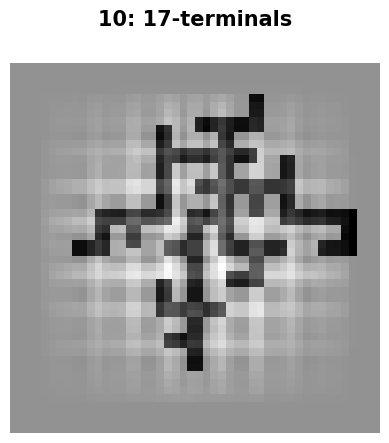

In [4]:
draw_image(X_train[18], y_train[18])

* As we can see, the image is a bit blurry due to the
  normalization procedures that the **load_data** method
  has applied to the original data.
* If you want to draw the raw data as it is in the HDF5 file, use the **h5_get**
  method to extract the raw image from the HDF5 file directly:

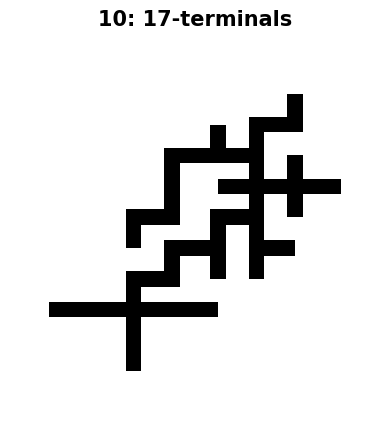

In [5]:
img = h5_get('train.h5', 'img_18')
id = y_train[18]
draw_image(img, id)

Sometimes we want to inspect a larger group of images in parallel, so we also provide a method
for drawing a grid of consecutive images.

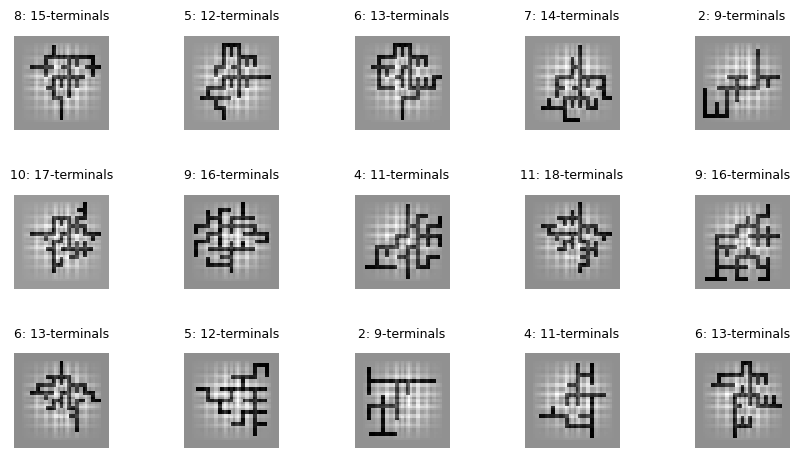

In [6]:
def draw_sample(X, y, n, rows=4, cols=4, imfile=None, fontsize=9):
    for i in range(0, rows*cols):
        plt.subplot(rows, cols, i+1)
        img = X[n+i].reshape(48,48)
        plt.imshow(img, cmap='gray', interpolation='none')
        id = y[n+i]
        plt.title("%d: %s" % (id, class_name[id]), fontsize=fontsize, y=1.08)
        plt.axis('off')
        plt.subplots_adjust(wspace=0.8, hspace=0.1)

plt.rcParams["figure.figsize"] = (10,6)
draw_sample(X_train, y_train, 400, 3, 5)

* Again, ignore the blurring images due to image normalization.
  The original images are pure black and white of course.

# **Counting terminals in RecTrees**
* Let's start with the terminals counting problem.
  Our aim is to build a neural network which accepts
  **48x48** grayscale image of a rectilinear
  tree and outputs the number of of terminals
  this tree has.

* When dealing with images, the general practice is to use
  **Convolution** and **Pooling** layers.
  These two types of layers are explained in more detail in the following two articles,
  which we recommend to read before you approach the following code:
  1. http://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf
  2. http://cs231n.github.io/convolutional-networks/

## **Model 1**
* We now build our first model for recognizing the number of terminals
  in a given rectilinear tree.
* We start with a simple Keras model which combines
  **SeparableConv2D**,
  **Convolution2D**,
  **BatchNormalization**,
  and
  **MaxPooling2D**,
  layers.
* We use a simplified version of the algorithm prescribed by
  [François Chollet](https://x.com/fchollet) in his Keras tutorial:
  https://keras.io/examples/vision/image_classification_from_scratch.

In [7]:
epochs = 50
#batch_size = 128
input_shape = X_train.shape[1:]

model1 = Sequential(name="model_1")

# Entry block
model1.add(Conv2D(128, 3, strides=2, padding="same"))
model1.add(BatchNormalization())
model1.add(ReLU())

# Block size=256
model1.add(ReLU())
model1.add(SeparableConv2D(256, 3, padding="same"))
model1.add(BatchNormalization())

model1.add(ReLU())
model1.add(SeparableConv2D(256, 3, padding="same"))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(3, strides=2, padding='same'))

# Block size=512
model1.add(ReLU())
model1.add(SeparableConv2D(512, 3, padding="same"))
model1.add(BatchNormalization())

model1.add(ReLU())
model1.add(SeparableConv2D(512, 3, padding="same"))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(3, strides=2, padding='same'))

#---------------------------------------------------------

model1.add(SeparableConv2D(512, 3, padding="same"))
model1.add(BatchNormalization())
model1.add(ReLU())


model1.add(GlobalAveragePooling2D())
model1.add(Dropout(0.25))
model1.add(Dense(num_classes, activation=None))

print(model1.summary())
save_model_summary(model1, "model_1_summary.txt")
write_file("model1.json", model1.to_json())
#fmon = FitMonitor(thresh=0.09, minacc=0.999, filename="model_1_autosave.h5")

#model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.compile(optimizer=Adam(3e-4), loss=BinaryCrossentropy(from_logits=True), metrics=[BinaryAccuracy(name="acc")])

hist = model1.fit(
    X_train,
    Y_train,
    #batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, Y_test),
    verbose=1,
)

model_file = "model1.keras"
print("Saving model to:", model_file)
model1.save(model_file)

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d (SeparableConv2D)   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_1 (SeparableConv2D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_2 (SeparableConv2D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_3 (SeparableConv2D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_4 (SeparableConv2D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ ?                           │     0 (unbuil

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d (SeparableConv2D)   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_1 (SeparableConv2D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_2 (SeparableConv2D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_3 (SeparableConv2D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_4 (SeparableConv2D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ ?                           │     0 (unbuil

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 17ms/step - acc: 0.9164 - loss: 0.2296 - val_acc: 0.9240 - val_loss: 0.1455
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - acc: 0.9252 - loss: 0.1525 - val_acc: 0.9361 - val_loss: 0.1296
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - acc: 0.9302 - loss: 0.1306 - val_acc: 0.9189 - val_loss: 0.1612
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - acc: 0.9375 - loss: 0.1138 - val_acc: 0.9448 - val_loss: 0.0935
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - acc: 0.9465 - loss: 0.0985 - val_acc: 0.9328 - val_loss: 0.1392
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - acc: 0.9553 - loss: 0.0854 - val_acc: 0.9558 - val_loss: 0.0846
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - acc: 0.9626 - loss: 0.0762 - val_acc: 0.9200 - val_loss: 0.1603
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - acc: 0.9681 - loss: 0.0680 - val_acc: 0.9584 - val_loss: 0.0750
Epoch 9/50
1875/187

* Model size is less than 10MB which is way less smaller than the data size.

In [8]:
!du -sm model1.keras

10	model1.keras


Training: accuracy   = 0.966096 loss = 0.086517
Validation: accuracy = 0.957552 loss = 0.120611
Over fitting score   = 0.014139
Under fitting score  = 0.017364
Params count: 786828
stop epoch = 49
epochs = 50


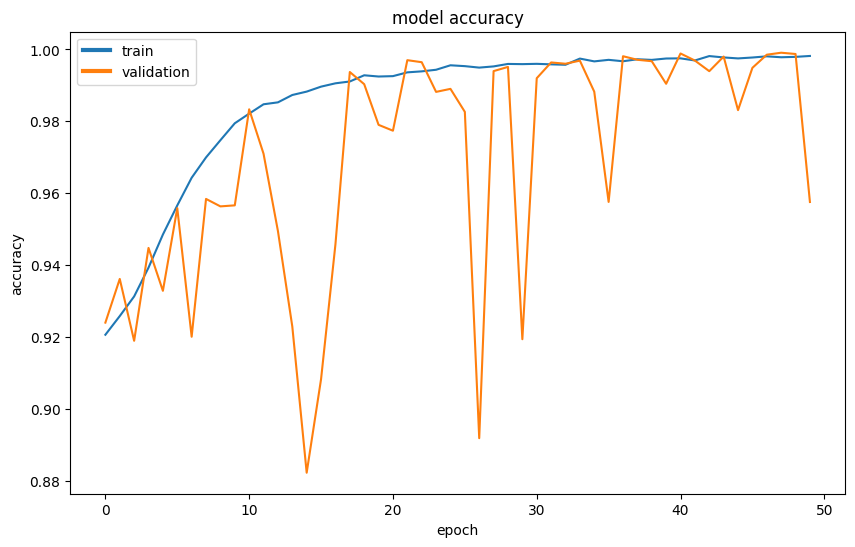

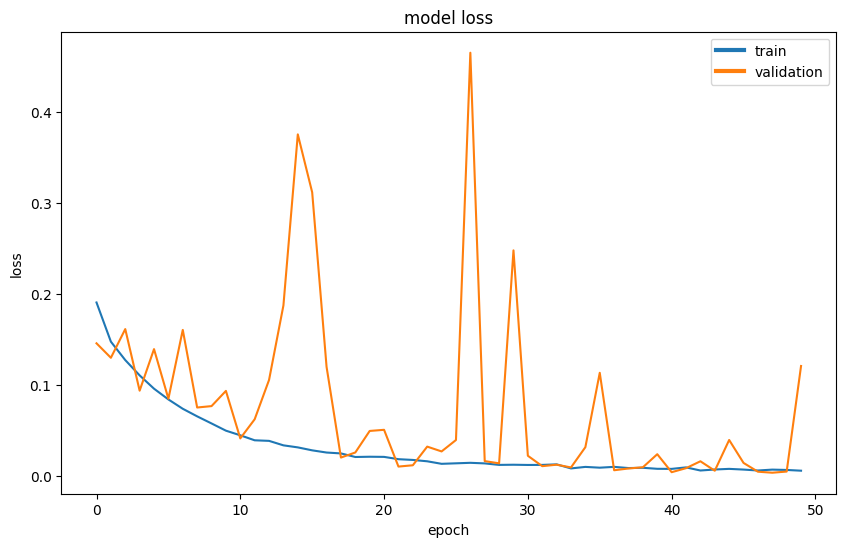

In [9]:
show_scores(model1, hist, X_train, Y_train, X_test, Y_test)

In [10]:
# If you need to reload your model (in a new session)
#model1 = tf.keras.models.load_model("model1.keras")

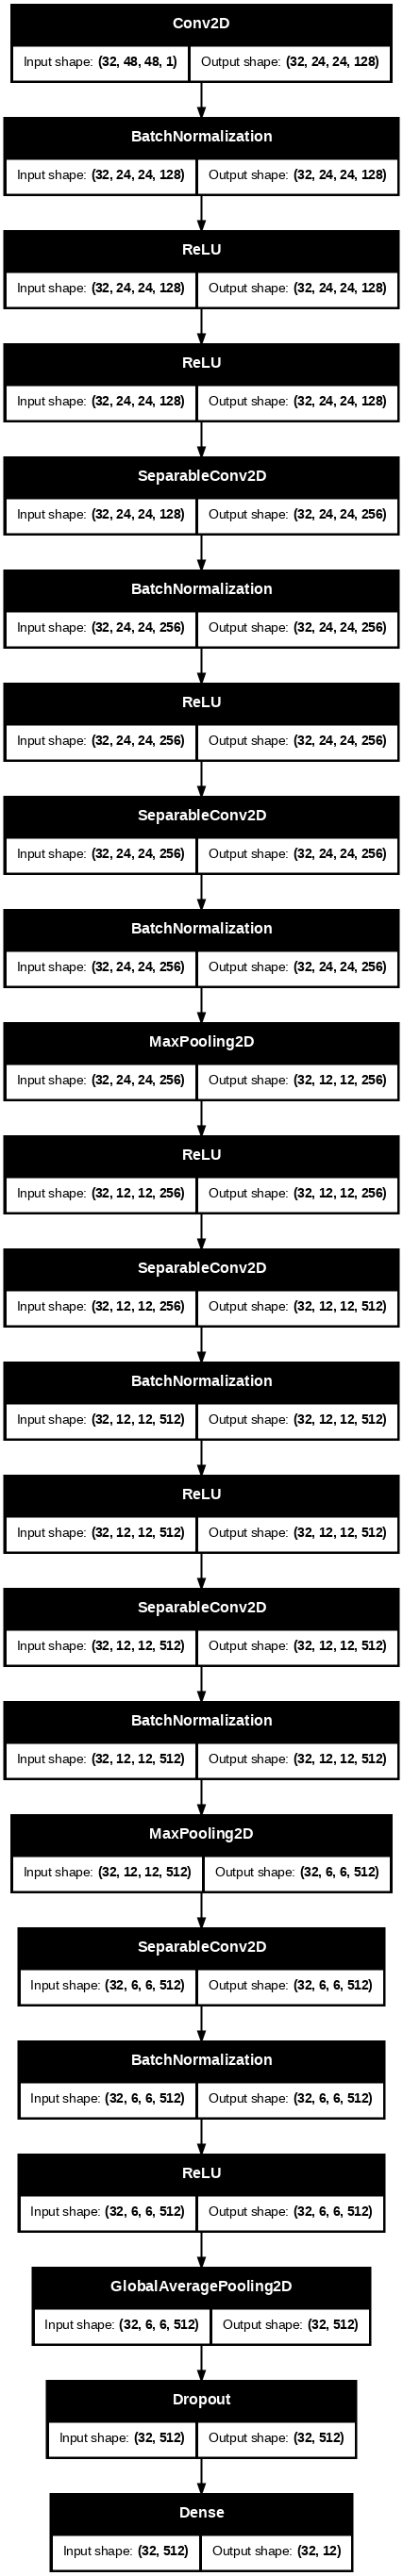

In [11]:
plot_model(model1, to_file="model1_scheme.png", show_layer_names=False, show_shapes=True, dpi=72)

### **Training Accuracy**

In [12]:
loss, accuracy = model1.evaluate(X_train, Y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.966096  ;  loss = 0.086517


### **Validation Accuracy**

In [13]:
loss, accuracy = model1.evaluate(X_test, Y_test, verbose=0)
print("Validation: accuracy1 = %f  ;  loss1 = %f" % (accuracy, loss))

Validation: accuracy1 = 0.957552  ;  loss1 = 0.120611


Although the training accuracy is quite high (99.9% !), the overall result is not good!
The 12% gap with respect to the validation accuracy is an alarming indication of overfitting
(which is also clearly noticeable from the accuracy and loss graphs above).
Our model is successful on the training set only and is not as successful for any other data.

## Inspecting the output
* Before we search for a new model, let's take a quick look on some of the cases that our model missed.
  It may give us clues on the strengths and weaknesses of NN models, and what we can expect
  from these artificial models.

* The **predict** method is helpful for getting a vector (**y_pred**)
  of the predicted classes of our **model 1**.
  We should compare **y_pred** to the expected true classes **y_test** in order to get
  the false cases:

In [14]:
x_pred = model1.predict(X_test)
y_pred = np.argmax(x_pred, axis=1)

true_preds = [(x,y) for (x,y,p) in zip(X_test, y_test, y_pred) if y == p]
false_preds = [(x,y,p) for (x,y,p) in zip(X_test, y_test, y_pred) if y != p]
print("Number of valid predictions: ", len(true_preds))
print("Number of invalid predictions:", len(false_preds))

750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
Number of valid predictions:  18018
Number of invalid predictions: 5982


* The array **false_preds** consists of all triples **(x,y,p)** where **x** is an image,
  **y** is its true class, and **p** is the false predicted value of **model**.
  
* Lets visualize a sample of 15 items:

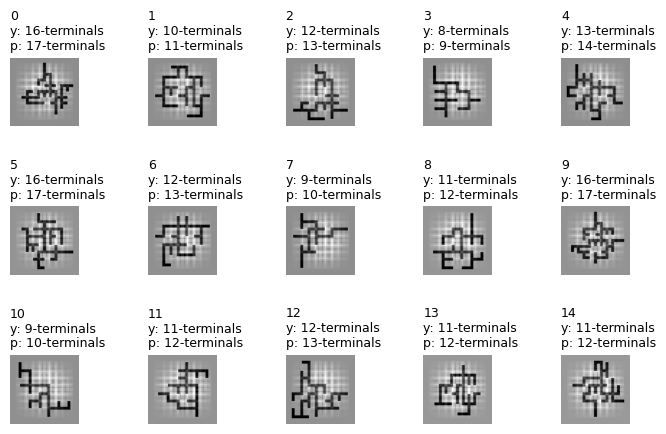

In [15]:
plt.figure(figsize=(8,5))
for i,(x,y,p) in enumerate(false_preds[0:15]):
    plt.subplot(3, 5, i+1)
    img = x.reshape(48,48)
    plt.imshow(img, cmap='gray')
    plt.title("%d\ny: %s\np: %s" % (i, class_name[y], class_name[p]), fontsize=9, loc='left')
    plt.axis('off')
    plt.subplots_adjust(wspace=1.0, hspace=0.7)

* Interestingly, in all the observed 15 cases,
  our model missed the correct answer by one terminal only,
  which is of course a good sign.
* Almost like human behavior (in fact when I try to count the number of terminals manualy, I sometimes
  miss by 2 or even by 3!)

In [16]:
print(f"Number of true predictions = {len(true_preds)}")
false_preds = {}
for i in range(1,10):
  false_preds[i] = [(x,y,p) for (x,y,p) in zip(X_test, y_test, y_pred) if abs(y-p)>=i]

for i in range(1,10):
  print(f"Number of {i} teminals error = {len(false_preds[i])}")

Number of true predictions = 18018
Number of 1 teminals error = 5982
Number of 2 teminals error = 2
Number of 3 teminals error = 0
Number of 4 teminals error = 0
Number of 5 teminals error = 0
Number of 6 teminals error = 0
Number of 7 teminals error = 0
Number of 8 teminals error = 0
Number of 9 teminals error = 0


# **Some more challenges**
* You can try counting the number of edges, number of vertices,
  or the number of corners.
  You will need to generate balanced data sets for
  these projects (see above).
* A more interesting challenge would be:
  can a neural network identify the **topological form** of
  a rectilinear tree?
  The topological form of a given tree T is the "smallest"
  cannonical tree which is geometrically isomorphic to T.
  Here are a few examples of trees and their topological forms:   

<IMG
src="https://samyzaf.com/ML/rectrees/images/topol2.png"
width="50%"
align="CENTER"
/>

* Each topology can be encoded by an integer, and our neural network accepts a 48x48 image of
  a rectilinear tree and needs to output the integer corresponding to its topology.
* The main obstacle we expect in this challenge is creating a large balanced
  training data set. There are a lot of topologies, and we'll probably need hundreds or maybe
  thousands sample for each topology, which can make the training set too large.
  We could restrict ourselves to a small subset of topoloies though.
  You will also need to mine the half million trees data sets to get enough samples in a balanced state.
* Other routing tree properties can be considered for creating
  similar deep learning challenges.
  Keep me updated if you try them!